In [1]:
from scipy.stats import skewnorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import log_loss

## Simulated Probability Distributions for Normal Distributed Probabilities (Both for 0 & 1 Class)

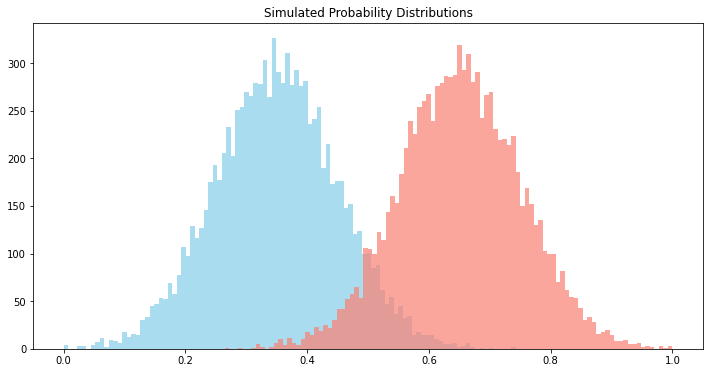

In [2]:
np.random.seed(42)
class_0_probs = np.clip(np.random.normal(0.35, 0.1, 10000), 0, 1)
class_1_probs = np.clip(np.random.normal(0.65, 0.1, 10000), 0, 1)

figure(figsize=(12, 6))
plt.hist(class_0_probs, 100, color='skyblue', alpha=0.7)
plt.hist(class_1_probs, 100, color='salmon', alpha=0.7)
plt.title('Simulated Probability Distributions')
plt.show()

In [3]:
y_true = np.concatenate([[0 for _ in range(10000)], [1 for _ in range(10000)]])
y_pred = np.concatenate([class_0_probs, class_1_probs])

roc_auc_score(y_true, y_pred)

0.98305953

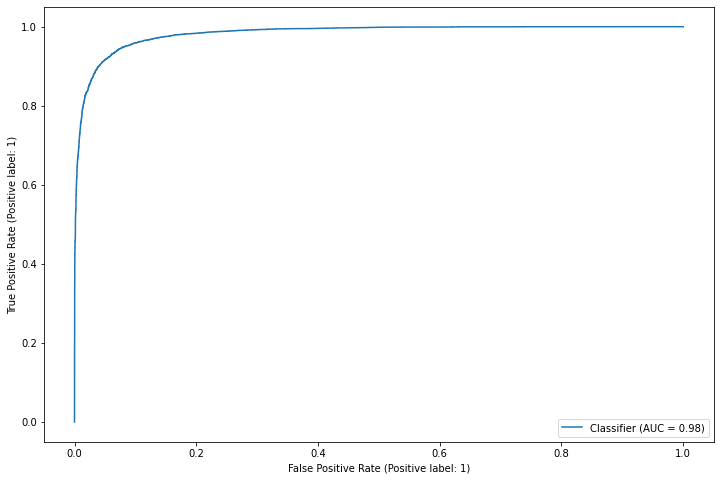

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1= fig.add_subplot(111)
RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax1)
plt.show()

In [5]:
log_loss(y_true, y_pred)

0.44192500369525894

## Simulated Probability Distributions for Skewed Distributed Probabilities

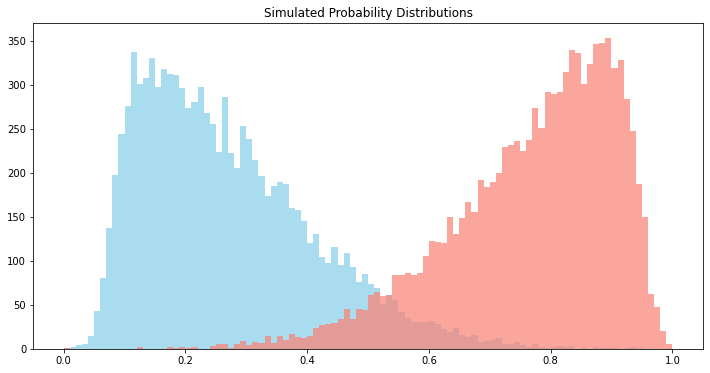

In [6]:
skewed_class_0_probs = skewnorm.rvs(a=10, loc=1, size=10000)
skewed_class_0_probs = skewed_class_0_probs - min(skewed_class_0_probs)
skewed_class_0_probs = skewed_class_0_probs / max(skewed_class_0_probs)
skewed_class_1_probs = skewnorm.rvs(a=-10, loc=1, size=10000)
skewed_class_1_probs = skewed_class_1_probs - min(skewed_class_1_probs)
skewed_class_1_probs = skewed_class_1_probs / max(skewed_class_1_probs)

figure(figsize=(12, 6))
plt.hist(skewed_class_0_probs, 100, color='skyblue', alpha=0.7)
plt.hist(skewed_class_1_probs, 100, color='salmon', alpha=0.7)
plt.title('Simulated Probability Distributions')
plt.show()

In [7]:
y_true_skewed = np.concatenate([[0 for _ in range(10000)], [1 for _ in range(10000)]])
y_pred_skewed = np.concatenate([skewed_class_0_probs, skewed_class_1_probs])

roc_auc_score(y_true_skewed, y_pred_skewed)

0.9847142700000002

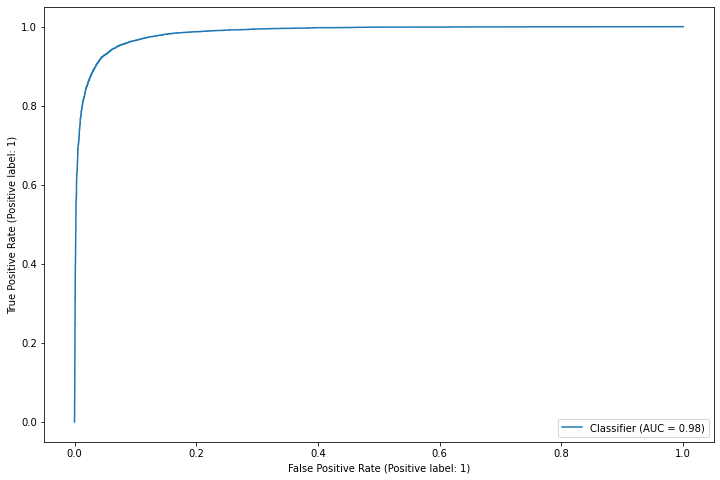

In [8]:
fig = plt.figure(figsize=(12, 8))
ax1= fig.add_subplot(111)
RocCurveDisplay.from_predictions(y_true_skewed, y_pred_skewed, ax=ax1)
plt.show()

In [9]:
log_loss(y_true_skewed, y_pred_skewed)

0.3136664027615923